# Extension 3 - Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

In [4]:
# Importing everything
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import cv2
import numpy as np
import os

# Load the database of known faces
known_faces = np.load('data/lfwcrop.npy')

# Load the corresponding names for each face in the database
with open('data/lfwcrop_ids.txt') as fp:
    known_face_names = fp.read().splitlines()




In [6]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


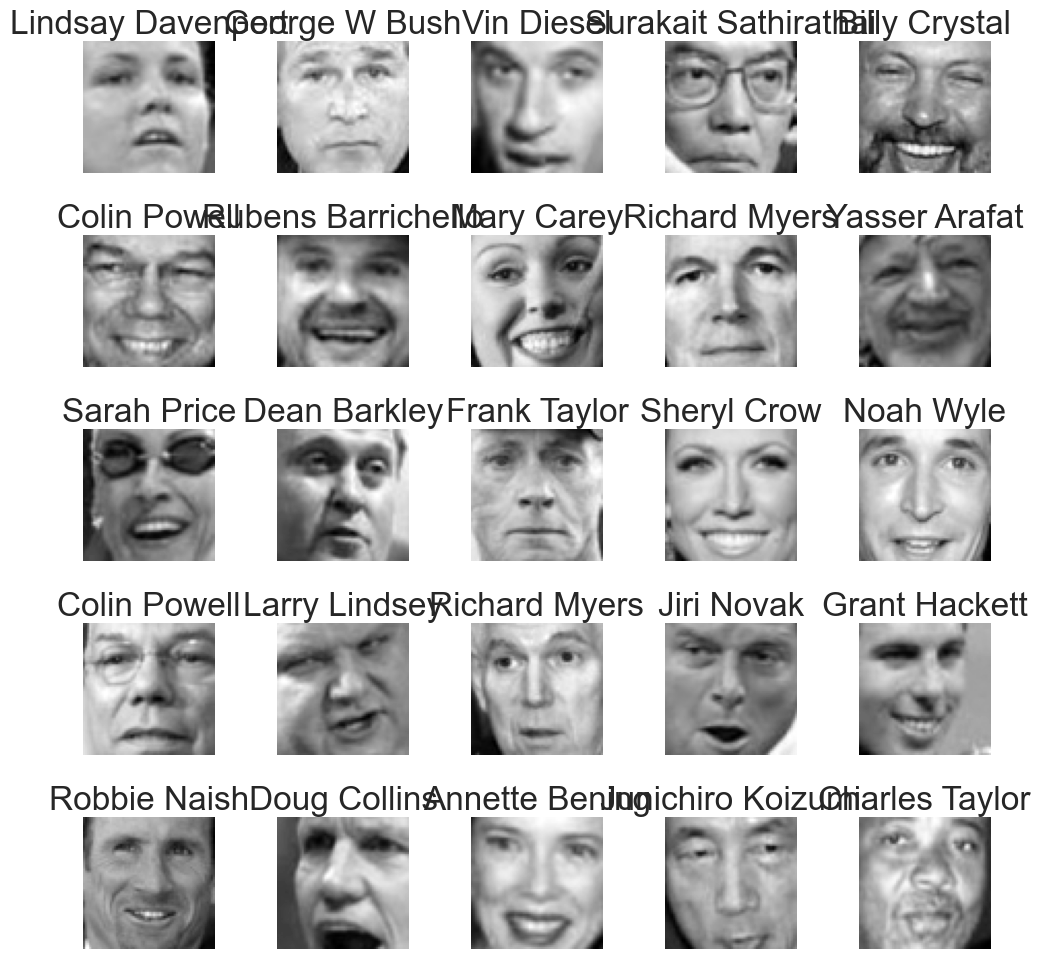

In [7]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, ax = plt.subplots(5, 5, figsize=(10, 10))
    for i in range(5):
        for j in range(5):
            ax[i, j].imshow(face_imgs[i * 5 + j], cmap=plt.get_cmap('gray'))
            ax[i, j].axis('off')
            ax[i, j].set_title(face_names[i * 5 + j])
    plt.tight_layout()
    plt.show()

face_plot(face_imgs, face_names)

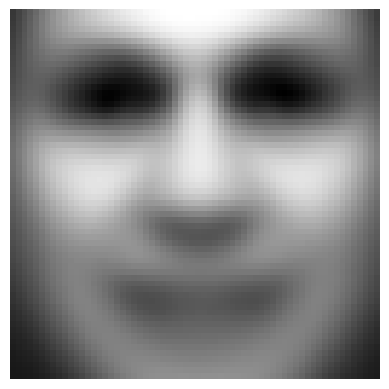

In [8]:
import matplotlib.pyplot as plt

mean_face = face_imgs.mean(axis=0)

# Show the mean face image
plt.imshow(mean_face, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()


In [9]:
# Reshape face data to make a standard matrix
face_imgs_vec = np.reshape(face_imgs, (13231, -1))

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')


Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


In [10]:
# 
# 1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.

import pandas as pd
from pca_cov import PCA_COV
import time

# Create pandas DataFrame object that holds the face data
face_df = pd.DataFrame(face_imgs_vec)

# Create PCA_COV object that holds the face DataFrame
pca_face = PCA_COV(face_df)

# Time how long the pca method takes to finish processing the data
start_time = time.time()

# Run PCA
pca_face.pca(vars=list(range(4096)))

# Print out the time elapsed
print(f"Time elapsed: {time.time() - start_time} seconds")


Time elapsed: 150.93466186523438 seconds


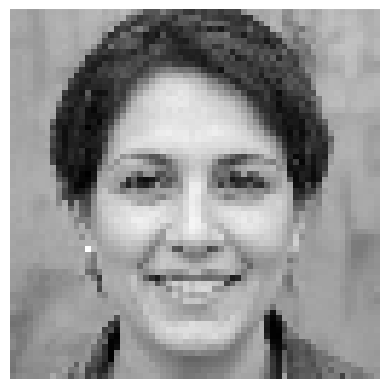

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 4096)

In [14]:
# Load the query image
query_img = cv2.imread('data/face_query.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the query image to match the size of the training images
query_img_resized = cv2.resize(query_img, (64, 64))

# Show the query image
plt.imshow(query_img_resized, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# Reshape the query image to a vector
query_img_vec = np.reshape(query_img_resized, (1, -1))

# Create pandas DataFrame object that holds the query image data
query_df = pd.DataFrame(query_img_vec)

# Project the query image into the PCA space
query_pca = pca_face.pca_project(query_df)


In [ ]:
# 3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).

# Project the face database into the PCA space
face_pca = pca_face.pca_project(face_df)

# Show the shape of the projected face database
print(f'Shape of projected face database is {face_pca.shape} and it should be (13231, 4096).')



In [ ]:
# 4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.

# Compute the Euclidean distance between the query image and each image in the database
dist = np.linalg.norm(face_pca - query_pca, axis=1)

# Show the shape of the distance array
print(f'Shape of distance array is {dist.shape} and it should be (13231,).')

In [ ]:
# 5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

# Set the match tolerance level
tol = 1000

# Find the index of the image in the database that is closest to the query image
match_idx = np.argmin(dist)

# Show the name of the person in the database that is closest to the query image
print(f'Closest match is {face_names[match_idx]}')

# Show the image of the person in the database that is closest to the query image
plt.imshow(face_imgs[match_idx], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# Show the distance between the query image and the closest match
print(f'Distance between query image and closest match is {dist[match_idx]}')